<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PHydro-cover-small.png">
*This is the Jupyter notebook version of the [Python in Hydrology](http://www.greenteapress.com/pythonhydro/pythonhydro.html) by Sat Kumar Tomer.*
*Source code is available at [code.google.com](https://code.google.com/archive/p/python-in-hydrology/source).*

*The book is available under the [GNU Free Documentation License](http://www.gnu.org/copyleft/fdl.html). If you have comments, corrections or suggestions, please send email to satkumartomer@gmail.com.*

<!--NAVIGATION-->
< [Interpolation](05.09-Interpolation.ipynb) | [Contents](Index.ipynb) | [Uncertainty Intervals](05.11-Uncertainty-Intervals.ipynb) >

## 5.10 自相关

自相关是信号与自身的相关性。这告诉信号如何在时间或空间上相关。这可以用来查看信号的周期性。为了证明这点，我们将首先使用周期为$4\pi$和幅度为2的正弦信号。图5.17显示了信号在上面板，自相关在下面板。使用`plt.acorr`函数绘制自相关。我们使用`plt.grid`函数在图中显示了网格。使用`plt.axhline`绘制了网格水平线0和$e^{-1}$。自相关显示了一个具有周期为$4\pi$的很好的周期性行为。

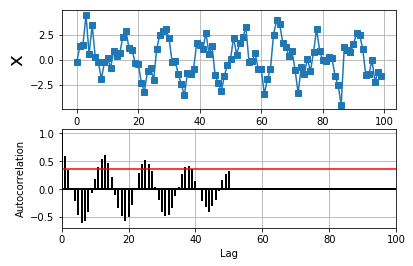

In [2]:
import numpy as np
import matplotlib.pyplot as plt
x = 2*np.sin(np.arange(100)/2.0) # periodic signal
x += np.random.randn(len(x)) # corrupted with noise

plt.subplot(2,1,1)
plt.plot(x, '-s')
plt.ylabel('x', fontsize=20)
plt.grid(True)
plt.xlabel('Time')

plt.subplot(2,1,2)
c = plt.acorr(x, usevlines=True, normed=True, maxlags=50, lw=2)
plt.grid(True)
plt.axhline(0, color='black', lw=2)
plt.axhline(1/np.exp(1), color='red')
plt.ylabel('Autocorrelation')
plt.xlim(xmin=0,xmax=100)
plt.xlabel('Lag')
plt.show()

<center>图5.17:显示使用正弦函数生成的100个随机数的图，以及该系列的自相关。</center>

自相关函数也被用于计算相关长度。相关长度是指与该点相关的物理属性之间没有进一步关联的点的距离。在数学上，相关长度是自相关等于$e^{-1}$的lag，这由图中的水平红线表示。让我们绘制一个具有较高周期性的图来计算相关长度。结果如图5.18所示。从图形上看，相关性约为9。

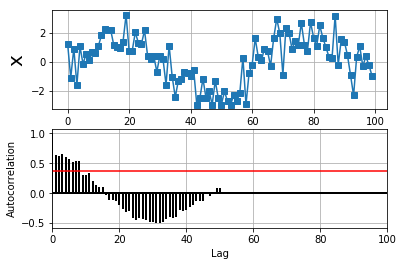

In [7]:
import numpy as np
import matplotlib.pyplot as plt
x = 2*np.sin(np.arange(100)/10.0) # periodic signal
x += np.random.randn(len(x)) # corrupted with noise

plt.subplot(2,1,1)
plt.plot(x, '-s')
plt.ylabel('x', fontsize=20)
plt.grid(True)
plt.xlabel('Time')

plt.subplot(2,1,2)
c = plt.acorr(x, usevlines=True, normed=True, maxlags=50, lw=2)
plt.grid(True)
plt.axhline(0, color='black', lw=2)
plt.axhline(1/np.exp(1), color='red')
plt.ylabel('Autocorrelation')
plt.xlim(xmin=0,xmax=100)
plt.xlabel('Lag')
plt.show()

<center>图5.18:显示使用正弦函数生成的100个随机数的图，以及该系列的自相关。</center>

为了精确地确定相关长度，我们将拟合lag和相关长度之间的插值函数，然后确定自相关变为$e^{-1}$的lag。`plt.acorr`在这些lag处返回滞后和自相关。首先，我们将各自为lag和自相关性赋单独的变量。我们也可以打印lag，看看里面是什么。

In [12]:
lags = c[0] # lags
auto_corr = c[1] # autocorrelation
print(lags)

[-50 -49 -48 -47 -46 -45 -44 -43 -42 -41 -40 -39 -38 -37 -36 -35 -34 -33
 -32 -31 -30 -29 -28 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15
 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3
   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50]


`acorr`提供正和负的lags。我们并不都需要，我们可以通过给出一个布尔格式的索引来解决这个问题，并通过使用`lags>=0`语句获得索引。我们还删除了对应于负lags的自相关数组。

In [13]:
auto_corr = auto_corr[lags>=0]
lags = lags[lags>=0]

现在，我们需要两个点的自相关，一个在阈值之上，另一个在阈值之下。我们通过计算自相关超过阈值的次数来得到它们的索引。

In [14]:
n = sum(auto_corr>np.exp(-1))
print(n)

9


一个点是在第八个索引处，和另一个点在第九个索引处。现在，当x的自相关等于阈值时，我们可以用`interp1d`来精确的得到lag值。这里提供的相关长度为8.74。

In [18]:
from scipy.interpolate import interp1d
f = interp1d([auto_corr[n], auto_corr[n-1]], [lags[n], lags[n-1]])
corr_len = f(np.exp(-1))
corr_len

array(8.742091971219681)